In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [27]:
class Trainer:

    def __init__(self, model, X_train, X_test, y_train, y_test):
        self.model = model
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
    
    def train(self):
        self.model.fit(self.X_train,self.y_train)
    
    def predict(self,x):
        return self.model.predict(x)
    
    def metrics(self):
        pred = self.predict(self.X_test)
        print(f"Accuracy: {accuracy_score(self.y_test,pred)}")
        print(f"F1 score: {f1_score(self.y_test,pred,average='macro')}")
    
    def confusion_matrix(self):
        pred = self.predict(self.X_test)
        ConfusionMatrixDisplay.from_predictions(self.y_test,pred)
        plt.show()

In [28]:
df = pd.read_csv("../proc_data/cstr.csv")
print(df.head())
y = df['class']
X = df.drop('class', axis=1)

   Unnamed: 0   feature1   feature2  class
0           0  41.322630  10.776732    0.0
1           1  40.282010  12.140834    0.0
2           2  43.180370  11.824053    0.0
3           3  42.052227  15.140845    0.0
4           4  41.748140  16.027851    0.0


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
np.unique(y_test, return_counts=True)


(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 array([36, 45, 55, 39, 58, 43, 40, 40, 38, 44, 48, 35, 51]))

In [31]:
np.unique(y_train, return_counts=True)


(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 array([184, 175, 165, 181, 162, 177, 180, 180, 182, 176, 172, 185, 169]))

### SVM

In [32]:
from sklearn.svm import SVC

model = SVC(random_state=0)
svc_trainer = Trainer(model, X_train, X_test, y_train, y_test)
svc_trainer.train()

In [33]:
svc_trainer.metrics()

Accuracy: 0.7884615384615384
F1 score: 0.7922916411210725


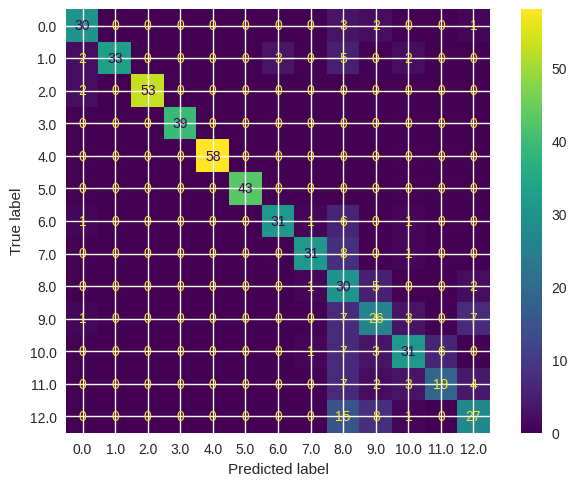

In [34]:
svc_trainer.confusion_matrix()